### What will be predicted score if a student studies for 9.25hrs/day ?

In [61]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

from sklearn import metrics  
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split  
%matplotlib inline

In [2]:
data = pd.read_csv(r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Checking the data types of the data 

In [3]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

Checking the data description

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Trying to find any relationship between the data.

In [5]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Here we can see there is the possitive correlation between the score and hours , still we'll check more various methods to see their relationship in between.

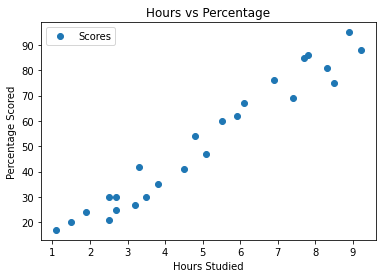

In [6]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

__Here we clearly can see that the data has the positive linear relationship with hours and scores__

__Now splitted the data into X and y variable where X is our feature and y is label__ 

In [8]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our features and labels,  splitted this data into training and test data. done this by using Scikit-Learn's  train_test_split() method:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [68]:
r2_score = model.score(X_test,y_test)
print(f'The accuracy of our model is : {round(r2_score*100, 2)} %')

The accuracy of our model is : 97.21 %


# Training the Algorithm

We have splitted our data into training and testing data, and now training our algorithm. 


In [13]:
model = LinearRegression()  
model.fit(X_train, y_train) 

print("Model Trained.")

Model Trained.


__Now plotting the regression line using the line formula (Y = Mx+b)__<br>
Where, 
> M : Slope of the data <br>
> x : Data Points <br>
> b : Intercept Point <br> 

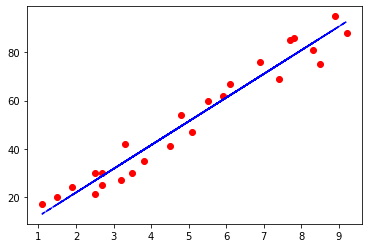

In [71]:
# Plotting the regression line
regression_line = model.coef_ * X + model.intercept_

# Plotting for the test data
plt.scatter(X, y, color='red')
plt.plot(X, regression_line, color='blue')
plt.show()

### Now Predicting the values
Now we have trained our algorithm, it's time to make predictions.

In [23]:
print(X_test, end=' ') # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[8.9]
 [1.9]
 [1.5]
 [7.4]
 [4.5]] 

__Now Comparing the Actual vs Predicted values__


In [24]:
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
compare

,Actual,Predicted
0,95,89.797688
1,24,20.803198
2,20,16.860655
3,69,75.013154
4,41,46.429723


__What will be predicted score if a student studies for 9.25hrs/day ?__


In [56]:
# Now checking the predicted score for the 9.25 hours of study
hours_study = 9.25

own_prediction = model.predict([[hours_study]])
print(f"No of Hours studied = {hours_study} Hour/Day")
print(f"Predicted Score = {round(own_prediction[0], 2)} %")

No of Hours studied = 9.25 Hour/Day
Predicted Score = 93.25 %


__So from our build model we can say that if a student studies 9.25 Hr/Day, He will score 93.25%__

__Evaluating the model__<break>

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [60]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.596267159282736


mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. So we can say that our prediction model has approx 4.5 points error while predicting the values

In [64]:
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred, squared=False))

Root Mean Squared Error: 4.749294515470339


Same goes with the Root Mean Square Error (RMSE) is shows approx 4.7 points